In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn import datasets

In [2]:
np.random.seed(5)

In [3]:
train_file='../eda/input/train_specific_hours_sample.csv'
df=pd.read_csv(train_file)

In [4]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed', 'click_date', 'hour', 'day', 'minute'],
      dtype='object')

In [5]:
# a =pd.DataFrame(data=1,index=range(0,5),columns=['ip'])
# b =pd.DataFrame(data=2,index=range(0,5),columns=['ip'])
# df=pd.concat([a,b],join='outer')
# df.reset_index(drop=True)
# df['channel'] = pd.DataFrame(data=1,index=range(0,10),columns=['channel'])
# df.head(10)

In [4]:
df_test=df.head(1000)

In [35]:
'_'.join(df.columns).replace('is_attributed_','')[0:80]

'ip_app_device_os_channel_click_time_attributed_time_click_date_hour_day_minute'

In [37]:
def cluster_name(df):
    return '_'.join(df.columns).replace('is_attributed_','')[0:80]
def cluster(df,n):
    res=AgglomerativeClustering(n_clusters=n).fit(df)
    import pandas as pd 
    df_clusters = pd.DataFrame(res.labels_)
    df_clusters.to_csv(cluster_name(df),index=False)
    return (df_clusters)

In [24]:
clusters_a=cluster(df_test[['channel','app', 'device', 'os','is_attributed']],8)

In [26]:
np.unique(clusters_a)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [38]:
#get % of fraudlent clicks

In [55]:
ip=[1,1,2,2,3,3,3,4,4,4,4]
is_attr=[1,1,0,0,1,0,0,1,1,1,1]
rand =[1,1,1,1,1,1,1,1,1,1,1]                      #1:2; 2:0, 3:1, 4:4

In [56]:
dd=pd.DataFrame()
dd['ip']=ip
dd['is_attr']=is_attr
dd['random']=rand
dd.head()

,ip,is_attr,random
0,1,1,1
1,1,1,1
2,2,0,1
3,2,0,1
4,3,1,1


In [79]:
dd.shape

(11, 3)

In [84]:
def get_non_fraudlent_percentage(df,col_list):
    agg_name=cluster_name(df)
    val=df.groupby(col_list)['is_attr']
    return (val.sum()/val.count()).rename(agg_name).to_frame().reset_index()
print(dd.shape)
xx=get_non_fraudlent_percentage(dd,['ip'])
dd.merge(xx,on=['ip'])

(11, 3)


,ip,is_attr,random,ip_is_attr_random
0,1,1,1,1.000000
1,1,1,1,1.000000
2,2,0,1,0.000000
3,2,0,1,0.000000
4,3,1,1,0.333333
5,3,0,1,0.333333
6,3,0,1,0.333333
7,4,1,1,1.000000
8,4,1,1,1.000000
9,4,1,1,1.000000


In [67]:
a =val.count()

In [69]:
b=val.sum()

In [74]:
b/a

ip
1    1.000000
2    0.000000
3    0.333333
4    1.000000
Name: is_attr, dtype: float64

In [61]:
dd.groupby(['ip'])['is_attr'].count()

ip
1    2
2    2
3    3
4    4
Name: is_attr, dtype: int64

In [60]:
dd.groupby(['ip'])['is_attr'].sum()

ip
1    2
2    0
3    1
4    4
Name: is_attr, dtype: int64

In [51]:
df_test.groupby(['ip','is_attributed'],sort=True).count().tail()

,,app,device,os,channel,click_time,attributed_time,click_date,hour,day,minute
ip,is_attributed,,,,,,,,,,
278102,0,1,1,1,1,1,0,1,1,1,1
278478,0,1,1,1,1,1,0,1,1,1,1
286457,0,1,1,1,1,1,0,1,1,1,1
286726,0,1,1,1,1,1,0,1,1,1,1
286954,0,1,1,1,1,1,0,1,1,1,1


In [ ]:
print('hi')

In [28]:
def plot(ip,channel,cluster_id):
    fignum = 1
    titles = ['IP']#, '3 clusters', '3 clusters, bad initialization']
    fig = plt.figure(fignum)
    ax = Axes3D(fig)
    ax.scatter(ip,channel,cluster_id,c=cluster_id.astype(np.float))
    ax.set_xticks(ip)
    ax.set_yticks(channel)
    ax.set_zticks(cluster_id)
    ax.set_xlabel('ip')
    ax.set_ylabel('channel')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

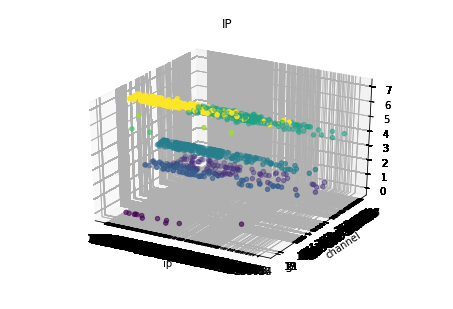

In [30]:
plot(df_test.ip,df_test.channel,clusters_a)

In [8]:
type(clusters)

numpy.ndarray

In [11]:
clusters

array([2, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)